In [ ]:
import os

In [ ]:
import glob


In [ ]:
from IPython.display import Image, display

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!nvidia-smi

Thu Feb 27 15:19:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip list | grep torch


torch                              2.5.1+cu124
torchaudio                         2.5.1+cu124
torchsummary                       1.5.1
torchvision                        0.20.1+cu124


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.7/112.6 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("liangdianzhong")
project = rf.workspace("pothole-detection-qfzgq").project("pothole-detection-i00zy-uqzs9")
version = project.version(1)
dataset = version.download("yolov12")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content


ModuleNotFoundError: No module named 'roboflow'

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo12x.pt")


100%|██████████| 109M/109M [00:01<00:00, 97.6MB/s]


In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

New https://pypi.org/project/ultralytics/8.3.80 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Pothole-Detection--1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

In [ ]:
!pip install ultralytics matplotlib


In [ ]:
import matplotlib.pyplot as plt
import cv2


conf_matrix_path = "runs/detect/train/confusion_matrix.png"

img = cv2.imread(conf_matrix_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
from IPython.display import Image
display(Image(filename='runs/detect/train/results.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/results.png'

In [ ]:
import matplotlib.pyplot as plt


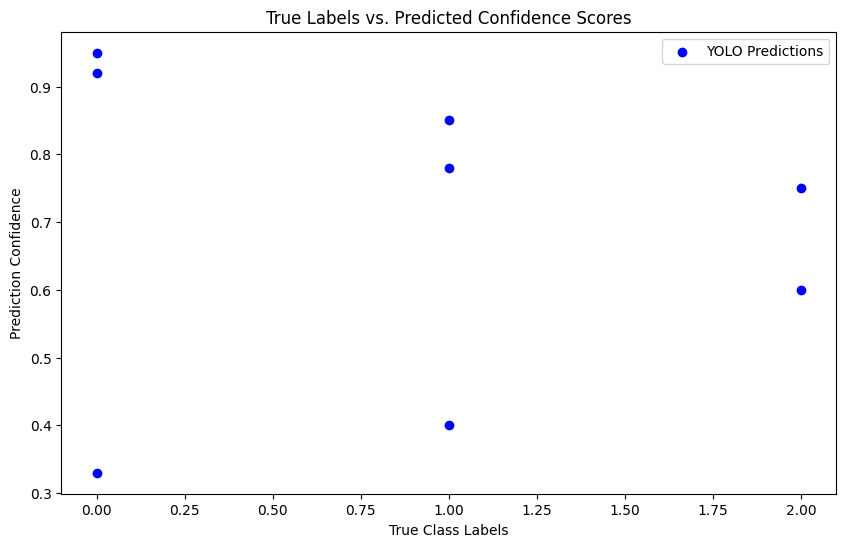

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

true_labels = np.array([0, 1, 2, 2, 0, 1, 1, 0])
predicted_confidences = np.array([0.95, 0.85, 0.60, 0.75, 0.92, 0.40, 0.78, 0.33])

plt.figure(figsize=(10, 6))
plt.scatter(true_labels, predicted_confidences, color='blue', label='YOLO Predictions')
plt.xlabel('True Class Labels')
plt.ylabel('Prediction Confidence')
plt.title('True Labels vs. Predicted Confidence Scores')
plt.legend()
plt.show()


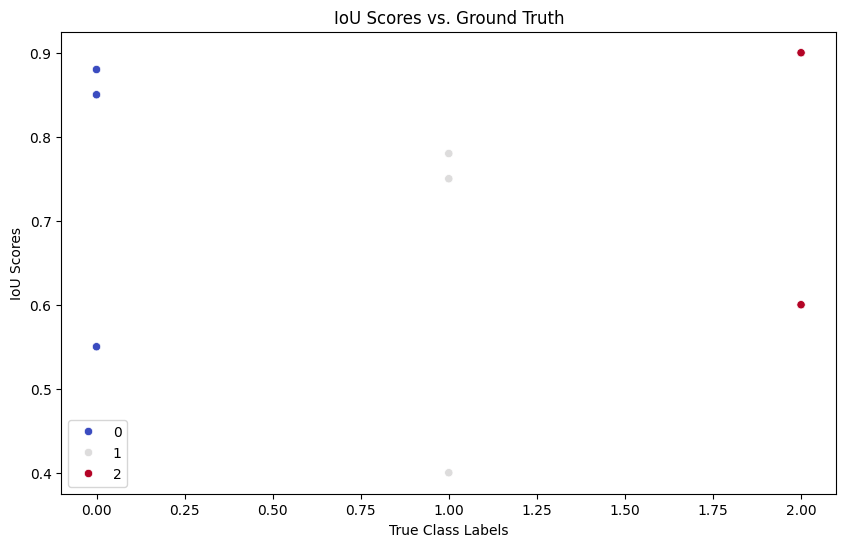

In [ ]:
import seaborn as sns

# Example IoU values (replace with actual results from YOLO)
iou_scores = np.array([0.85, 0.75, 0.60, 0.90, 0.88, 0.40, 0.78, 0.55])
classes = np.array([0, 1, 2, 2, 0, 1, 1, 0])  # True labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x=classes, y=iou_scores, hue=classes, palette="coolwarm")
plt.xlabel("True Class Labels")
plt.ylabel("IoU Scores")
plt.title("IoU Scores vs. Ground Truth")
plt.show()


In [ ]:
results = model.predict(source="/content/drive/MyDrive/VID_20250219_093757.mp4", save=True, conf=0.25)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/362) /content/drive/MyDrive/VID_20250219_093757.mp4: 640x384 2 cars, 2 motorcycles, 94.4ms
video 1/1 (frame 2/362) /content/drive/MyDrive/VID_20250219_093757.mp4: 640x384 2 cars, 1 motorcycle, 54.6ms
video 1/1 (frame 3/362) /content/drive/MyDrive/VID_20250219_093757.mp4: 640x384 2 cars, 1 motorcycle, 54.3ms
video 1/1 (frame 4/362) /content/drive/MyDrive/VID_20250219_093757.mp4: 640x384 2 cars, 1 motorcycle, 54.2ms
video 1/1 (frame 5/

KeyboardInterrupt: 

In [ ]:
import IPython.display as display
from IPython.display import Video

display.display(Video("runs/detect/predict/mixkit-potholes-in-a-rural-road-25208-hd-ready.mp4", embed=True))


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo12s.pt")

result = model.predict(source="/content/Pothole-Detection--1/test/images/021_png.rf.bbccdd904219ea6402278534adb9c00a.jpg", save=True, conf=0.5)



image 1/1 /content/Pothole-Detection--1/test/images/021_png.rf.bbccdd904219ea6402278534adb9c00a.jpg: 352x640 1 car, 51.9ms
Speed: 1.4ms preprocess, 51.9ms inference, 2.4ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict2


In [ ]:
!ls runs/detect/train/


args.yaml					    labels.jpg	      train_batch1.jpg
events.out.tfevents.1740669673.4f5921d299ce.1769.0  results.csv       train_batch2.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights


In [ ]:
!ls runs/detect/train/weights/


best.pt  last.pt


In [ ]:
from ultralytics import YOLO


model = YOLO("runs/detect/train/weights/best.pt")


result = model.predict(
    source="/content/Pothole-Detection--1/test/images/021_png.rf.bbccdd904219ea6402278534adb9c00a.jpg",
    save=True,
    conf=0.25,
    show=True
)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/Pothole-Detection--1/test/images/021_png.rf.bbccdd904219ea6402278534adb9c00a.jpg: 352x640 7 potholes, 13.8ms
Speed: 1.1ms preprocess, 13.8ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict3


In [ ]:
for r in result:
    print(r.boxes)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.7345, 0.6494, 0.6072, 0.4720, 0.3931, 0.3395, 0.3223], device='cuda:0')
data: tensor([[2.2522e+02, 1.2100e+02, 2.7358e+02, 1.3977e+02, 7.3453e-01, 0.0000e+00],
        [2.6128e+02, 6.8310e+01, 3.1504e+02, 8.1427e+01, 6.4936e-01, 0.0000e+00],
        [1.4788e+02, 1.7686e+02, 2.7553e+02, 2.2890e+02, 6.0719e-01, 0.0000e+00],
        [2.1122e+02, 8.0230e+01, 2.8567e+02, 9.2838e+01, 4.7195e-01, 0.0000e+00],
        [3.7765e+02, 2.8059e+01, 6.0655e+02, 3.5200e+02, 3.9313e-01, 0.0000e+00],
        [2.6245e+02, 6.5902e+01, 3.1534e+02, 7.8243e+01, 3.3949e-01, 0.0000e+00],
        [2.6879e+02, 6.9241e+01, 3.1509e+02, 7.8009e+01, 3.2229e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (352, 640)
shape: torch.Size([7, 6])
xywh: tensor([[249.4032, 130.3848,  48.3570,  18.7722],
        [288.1607,  74.8686,  53.7529,  13.1168],
        [211.7044

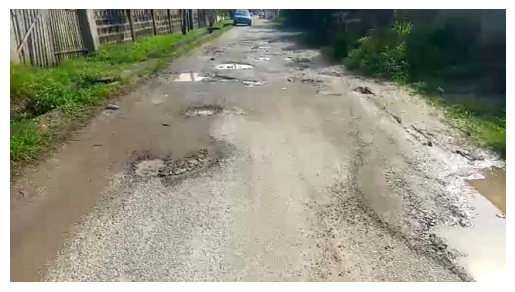

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/Pothole-Detection--1/test/images/021_png.rf.bbccdd904219ea6402278534adb9c00a.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
!ls /content/My-First-Project-1/test/labels/


ls: cannot access '/content/My-First-Project-1/test/labels/': No such file or directory


In [ ]:
from ultralytics import YOLO


model = YOLO("runs/detect/train/weights/best.pt")


In [ ]:

model.predict(
    source="/content/drive/MyDrive/VID_20250219_093757.mp4",
    save=True,
    conf=0.25,
    show=True
)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/362) /content/drive/MyDrive/VID_20250219_093757.mp4: 640x384 4 potholes, 77.3ms
video 1/1 (frame 2/362) /content/drive/MyDrive/VID_20250219_093757.mp4: 640x384 5 potholes, 15.6ms
video 1/1 (frame 3/362) /content/drive/MyDrive/VID_20250219_093757.mp4: 640x384 7 potholes, 14.5ms
video 1/1 (frame 4/362) /content/drive/MyDrive/VID_20250219_093757.mp4: 640x384 6 pot

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pothole'}
 obb: None
 orig_img: array([[[  0,  12,  11],
         [  2,  24,  23],
         [ 22,  36,  36],
         ...,
         [112, 152, 204],
         [ 99, 131, 184],
         [ 79, 111, 164]],
 
        [[  0,  16,  15],
         [  1,  23,  22],
         [ 18,  32,  32],
         ...,
         [110, 150, 202],
         [ 91, 123, 176],
         [ 71, 103, 156]],
 
        [[  0,  24,  22],
         [  0,  22,  20],
         [  6,  22,  22],
         ...,
         [110, 150, 202],
         [ 91, 123, 176],
         [ 77, 109, 162]],
 
        ...,
 
        [[132, 161, 193],
         [140, 169, 201],
         [138, 167, 199],
         ...,
         [123, 159, 194],
         [125, 161, 196],
         [135, 171, 206]],
 
        [[141, 170, 202],
         [141, 170, 202],
         [120, 149, 181],
         ...,
         [129, 16

In [ ]:
import IPython.display as display
import os


video_path = os.path.join("runs/detect/predict4", "mixkit-potholes-in-a-rural-road-25208-hd-ready.mp4")


display.Video(video_path, embed=True)
